In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import voigt_profile
from scipy.optimize import curve_fit

In [3]:
def

def bivoigt(x, a1, s1, g1, a2, s2, g2):
    return a1 * voigt_profile(x, s1, g1)/ voigt_profile(0, s1, g1) + a2 * voigt_profile(x - 228.2, s2, g2)/ voigt_profile(0, s2, g2)


def bivoigt_equal(x, a1, a2, s):
    return a1 * voigt_profile(x, s, 11.0) / voigt_profile(0, s, 11.0) + a2 * voigt_profile(x - 228.2, s, 11.0) /  voigt_profile(0, s, 11.0)


def preprocess(x, y, left=0.2, right=0.2):
    plt.figure(figsize=(12, 4))
    plt.plot(x, y, color="blue")

    cut1 = round(len(x) * left)
    cut2 = round(len(x) * right)
    temp_x, temp_y = x[cut1:-cut2], y[cut1:-cut2]

    plt.plot(temp_x, temp_y, color="red")
    plt.tight_layout()
    return temp_x, temp_y


def process(x, y, left=0.2, right=0.2, mid=0.5):
    plt.figure(figsize=(14, 4))
    
    plt.subplot(221)
    plt.plot(x, y, color="blue")

    cut1 = round(len(x) * left)
    cut2 = round(len(x) * right)
    k1, b1 = np.polyfit(x[:cut1], y[:cut1], deg=1)
    k2, b2 = np.polyfit(x[-cut2:], y[-cut2:], deg=1)

    plt.subplot(222)
    plt.plot(x, y, color="blue")
    plt.plot(x, k1 * x + b1, color="green")
    plt.plot(x, k2 * x + b2, color="red")

    temp_x, temp_y = x[:], y[:]

    plt.subplot(223)
    intercept = len(x[x < (b2 - b1) / (k1 - k2)])
    temp_y[:intercept] -= (k1 * x[:intercept] + b1)
    temp_y[intercept:] -= (k2 * x[intercept:] + b2)
    plt.plot(temp_x[:round(len(temp_x) * mid)], temp_y[:round(len(temp_x) * mid)], color="red")
    plt.plot(temp_x[round(len(temp_x) * mid):], temp_y[round(len(temp_x) * mid):], color="blue")

    

    plt.subplot(224)
    
    
    idx1, idx2 = np.argmax(temp_y[:round(len(temp_x) * mid)]), np.argmax(temp_y[round(len(temp_x) * mid):]) + round(len(temp_x) * mid)
    m1, m2 = temp_x[idx1], temp_x[idx2]

    temp_x = (temp_x - m1) * 228.2 / (m2 - m1)
    temp_y *= 5.7 / 20

    plt.scatter(temp_x, temp_y, color="red", s=10, alpha=0.2)

    kernel_size = 500
    kernel = np.ones(kernel_size) / kernel_size
    temp_y = np.convolve(temp_y, kernel, mode='same')

    plt.figure(figsize=(8, 6))
    plt.plot(temp_x, temp_y, color="blue")
    plt.xlabel("MHz")
    plt.ylabel("nW")

    plt.tight_layout()

    return temp_x, temp_y, idx1, idx2


def fit(x, y, idx1, idx2):
    p1, p2 = curve_fit(voigt, x[:idx1], y[:idx1])[0], curve_fit(voigt, x[idx2:] - 228.2, y[idx2:])[0]
    a1, s1, g1, a2, s2, g2 = *p1, *p2
    s = (s1 + s2) / 2
    g = (g1 + g2) / 2

    params = curve_fit(bivoigt_equal, x, y, [a1, a2, s])[0]

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.scatter(x, y, alpha=0.1, s=1, color="black")
    plt.plot(x, voigt(x, *p1) + voigt(x - 228.2, *p2), color="blue", label="sum")
    plt.xlabel("MHz")
    plt.ylabel("nW")
    plt.legend()

    plt.subplot(122)
    plt.scatter(x, y, alpha=0.1, s=1, color="black")
    plt.plot(x, bivoigt_equal(x, *params), color="red", label="equal")
    plt.legend()
    plt.xlabel("MHz")
    plt.ylabel("nW")

    plt.tight_layout()

    return params, [a1, a2, s1, s2, g1, g2] voigt(x, a, s, g):
    return a * voigt_profile(x, s, g)



[1.47081529e-02 5.25158543e-03 5.89183385e+01] [2.187938854909882, 0.9895428517172121, 34.82842281069681, 86.50763766108398, 27.513868659726356, -16.864974369825042]


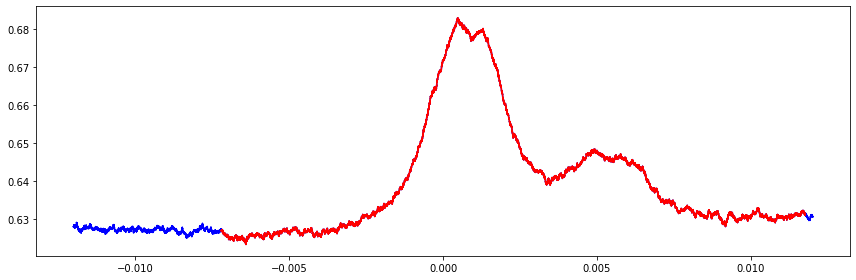

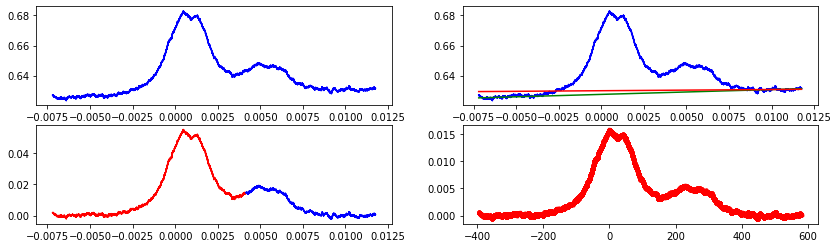

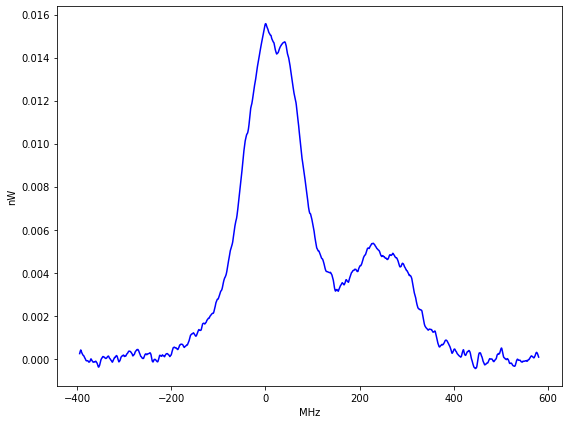

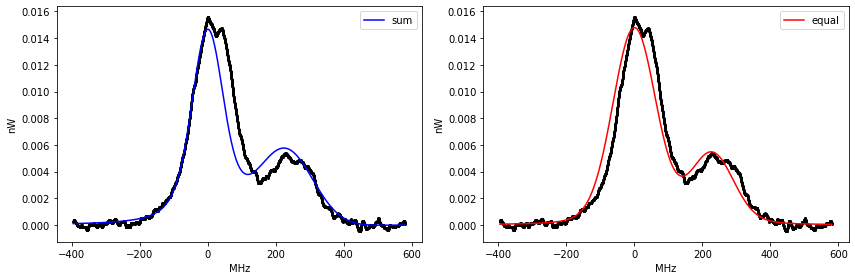

In [41]:
data = pd.read_csv("data/newnew_data/{}.CSV".format(362))

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])

x, y = preprocess(x, y, 0.2, 0.01)

x, y, idx1, idx2 = process(x, y, 0.1, 0.1, 0.6)

params362_1, params362_2 = fit(x, y, idx1, idx2)

print(params362_1, params362_2)

[1.58661154e-02 5.88013941e-03 6.04026658e+01] [2.494256899589646, 1.2632172443969185, 32.328923462337755, 99.59623069620538, 32.63838352562587, -20.972515142523946]


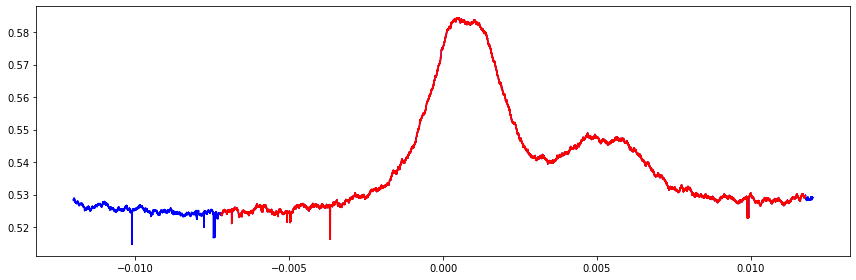

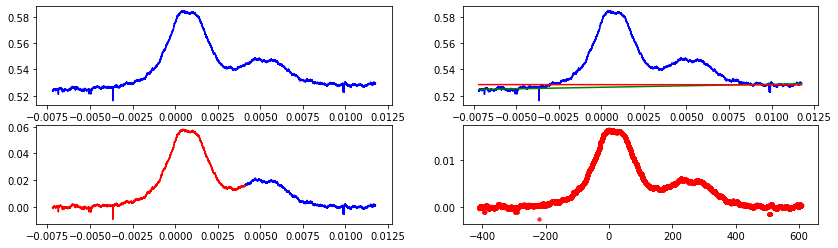

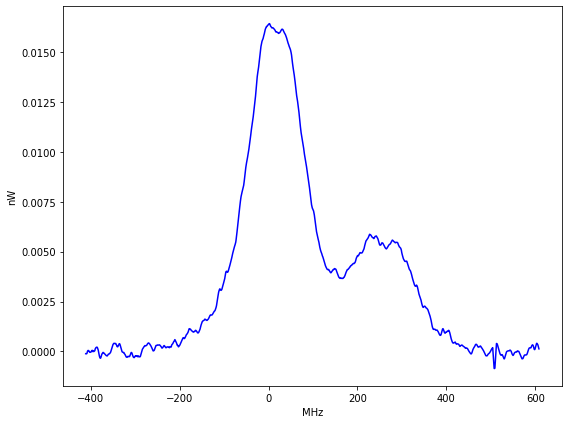

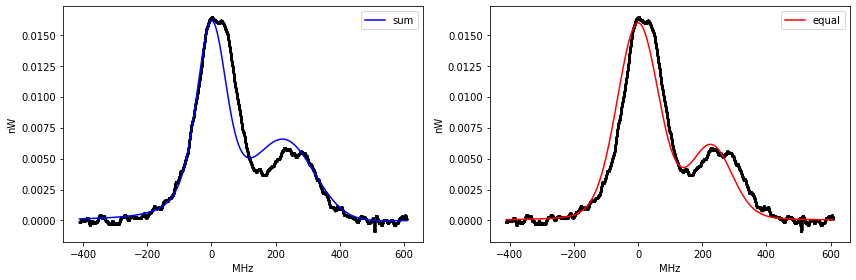

In [44]:
data = pd.read_csv("data/newnew_data/{}.CSV".format(371))

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])
x, y = preprocess(x, y, 0.2, 0.01)

x, y, idx1, idx2 = process(x, y, 0.1, 0.15, 0.6)

params371_1, params371_2 = fit(x, y, idx1, idx2)

print(params371_1, params371_2)

[1.78206958e-02 8.01162364e-03 6.16811276e+01] [2.9106240743009084, 2.0024807511977114, 41.14558009427093, 90.77628804519975, 25.823241215237477, 12.205565000635229]


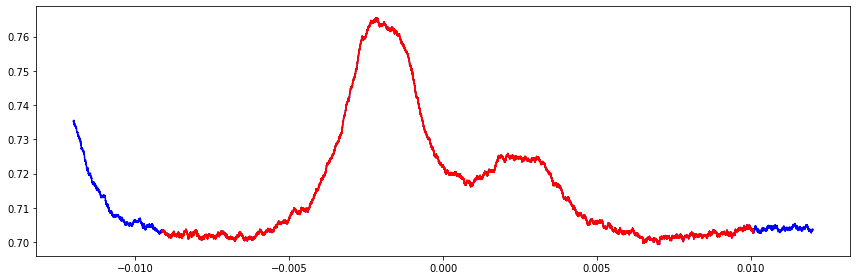

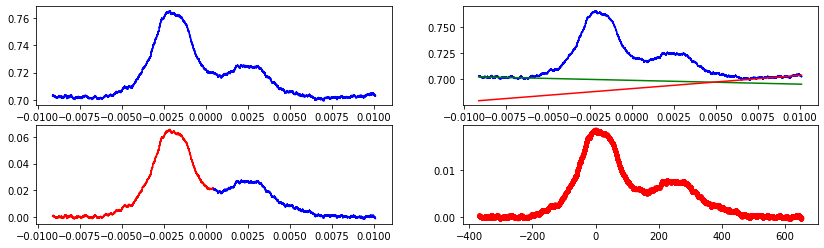

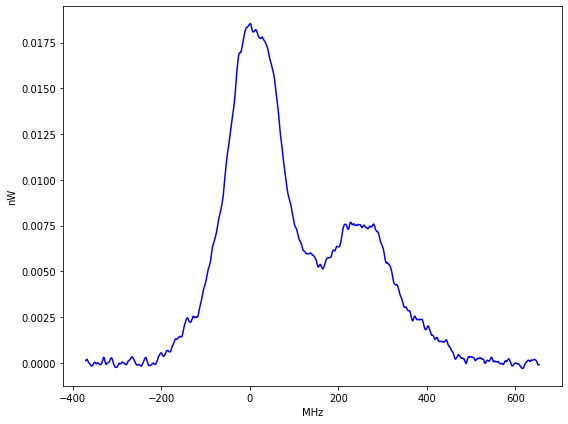

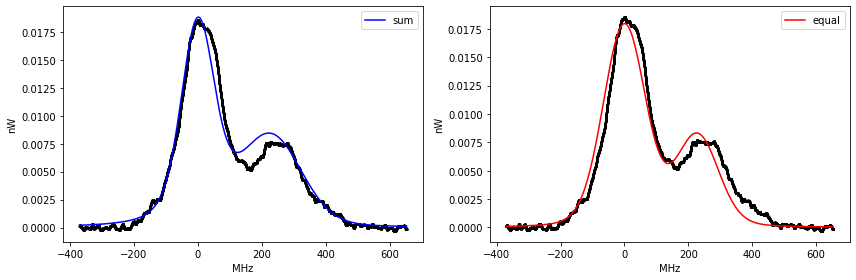

In [5]:
data = pd.read_csv("data/newnew_data/{}.CSV".format(381))

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])
x, y = preprocess(x, y, 0.12, 0.08)

x, y, idx1, idx2 = process(x, y, 0.1, 0.1)

params381_1, params381_2 = fit(x, y, idx1, idx2)

print(params381_1, params381_2)

[2.00646853e-02 7.02402391e-03 6.19696695e+01] [3.529189476811656, 1.4642747150690048, 46.382925411632996, 99.56770235953817, 26.99996956134825, -26.752146740574005]


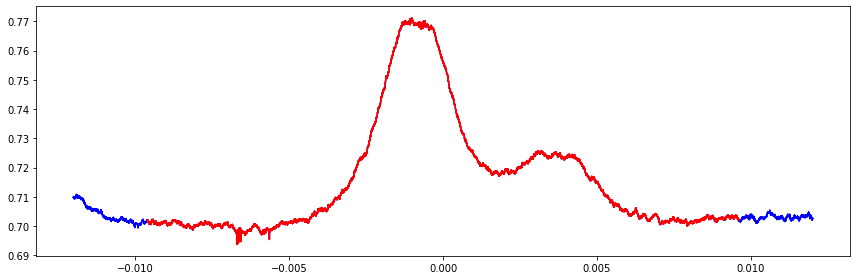

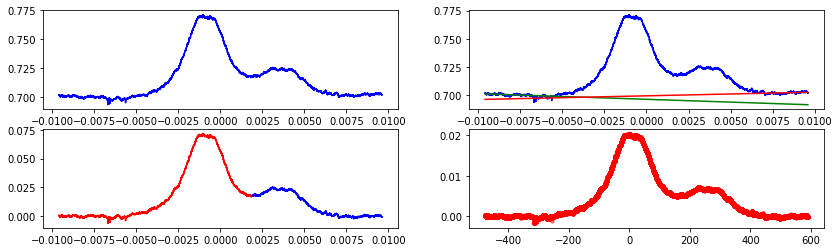

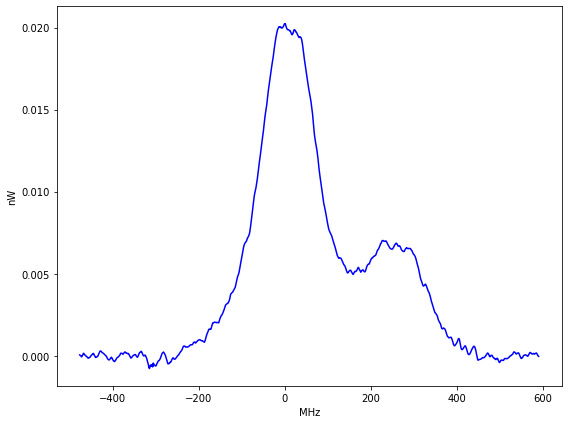

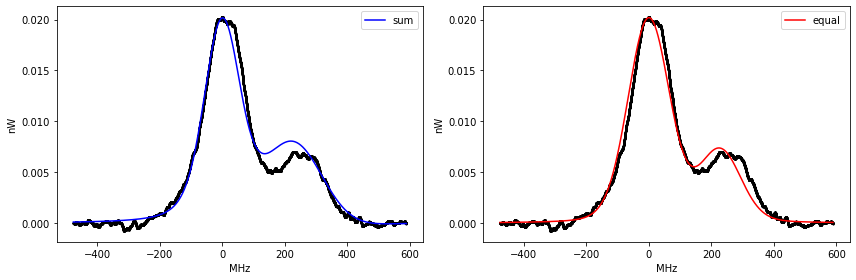

In [93]:
data = pd.read_csv("data/newnew_data/{}.CSV".format(390))

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])
x, y = preprocess(x, y, 0.1, 0.1)

x, y, idx1, idx2 = process(x, y, 0.15, 0.15, 0.6)

params390_1, params390_2 = fit(x, y, idx1, idx2)

print(params390_1, params390_2)

[2.10074632e-02 7.18322090e-03 5.12041321e+01] [2.555513588824018, 0.952008493766313, 48.43891029874319, 50.072455984195685, 1.0775107374344435, 3.7872336143970076]


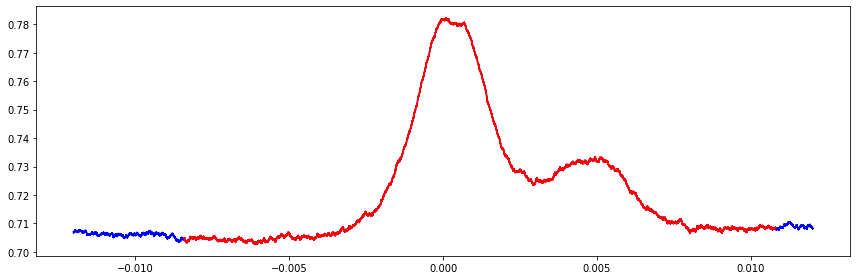

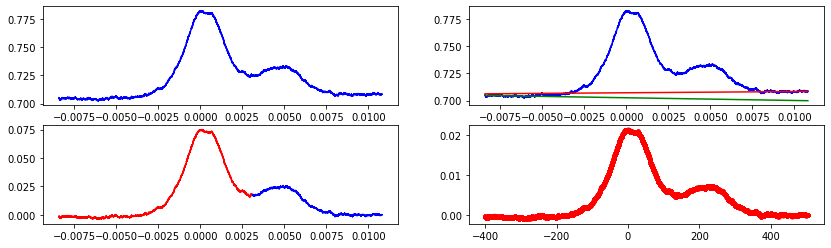

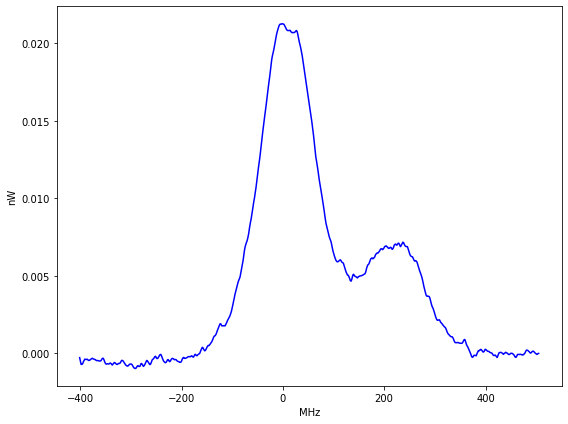

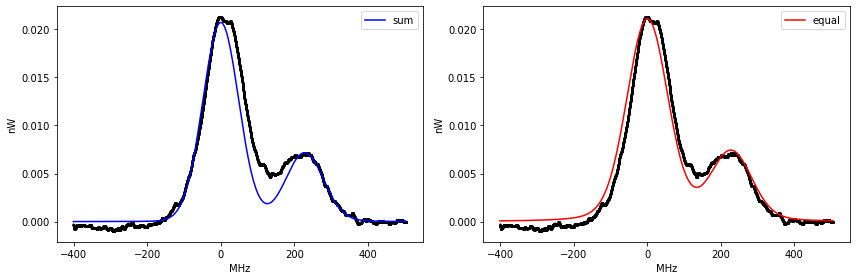

In [91]:
data = pd.read_csv("data/newnew_data/{}.CSV".format(400))

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])
x, y = preprocess(x, y, 0.15, 0.05)

x, y, idx1, idx2 = process(x, y, 0.1, 0.15, 0.6)

params400_1, params400_2 = fit(x, y, idx1, idx2)

print(params400_1, params400_2)

[2.10074632e-02 7.18322090e-03 5.12041321e+01] [2.555513588824018, 0.952008493766313, 48.43891029874319, 50.072455984195685, 1.0775107374344435, 3.7872336143970076]


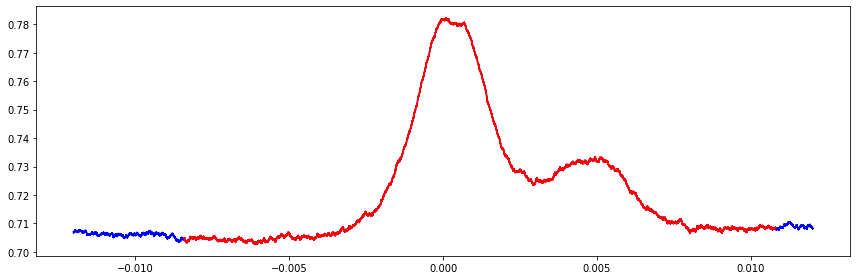

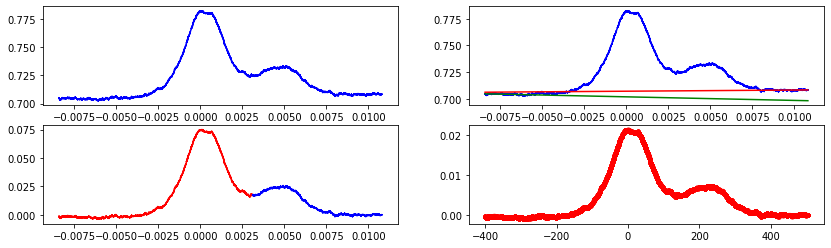

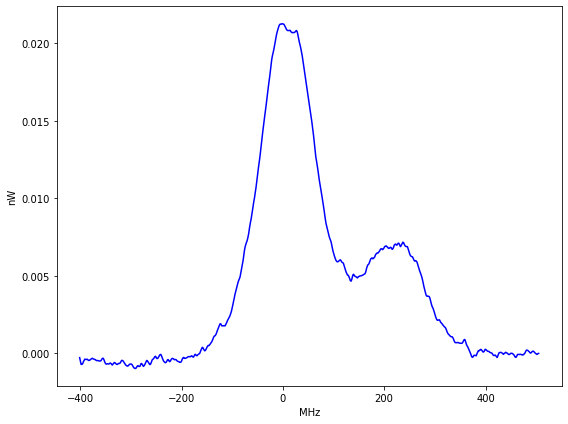

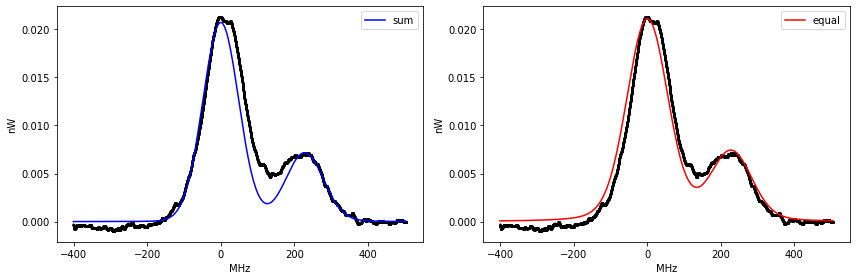

In [89]:
data = pd.read_csv("data/newnew_data/{}.CSV".format(400))

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])
x, y = preprocess(x, y, 0.15, 0.05)

x, y, idx1, idx2 = process(x, y, 0.15, 0.15, 0.6)

params400_1, params400_2 = fit(x, y, idx1, idx2)

print(params400_1, params400_2)

[2.22734195e-02 8.24042412e-03 5.61771993e+01] [3.4732133045408053, 1.4197274060927316, 39.26928436271276, 77.55750184204807, 25.723981633783033, -11.078706136377857]


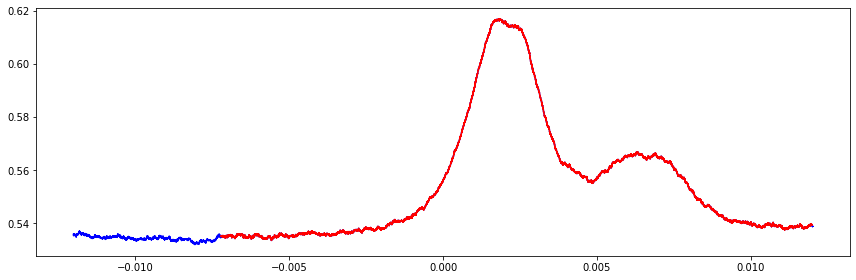

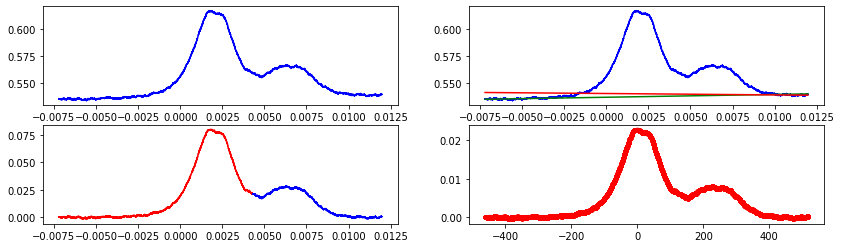

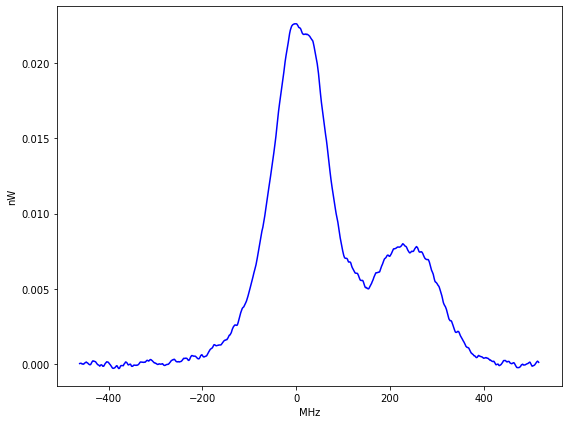

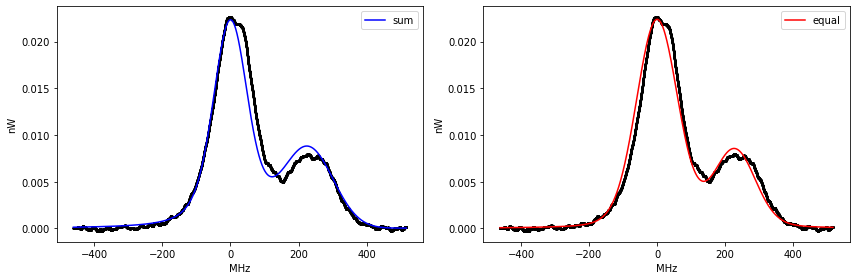

In [88]:
data = pd.read_csv("data/newnew_data/{}.CSV".format(408))

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])
x, y = preprocess(x, y, 0.2, 0.001)

x, y, idx1, idx2 = process(x, y, 0.15, 0.07, 0.6)

params408_1, params408_2 = fit(x, y, idx1, idx2)

print(params408_1, params408_2)

[2.23341505e-02 8.67592467e-03 5.90705380e+01] [3.3838824306026476, 1.9031196297182125, 36.01399192449773, 82.42687924586349, 27.021251374250355, 3.748415776623392]


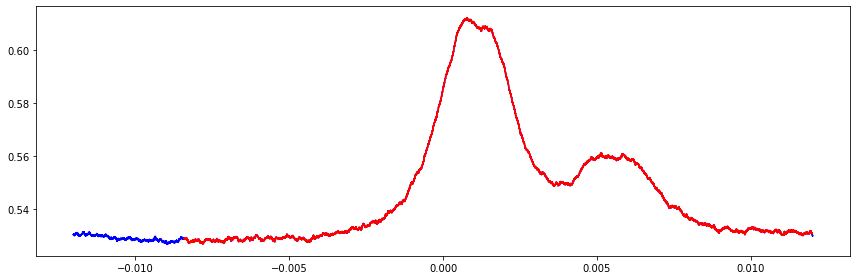

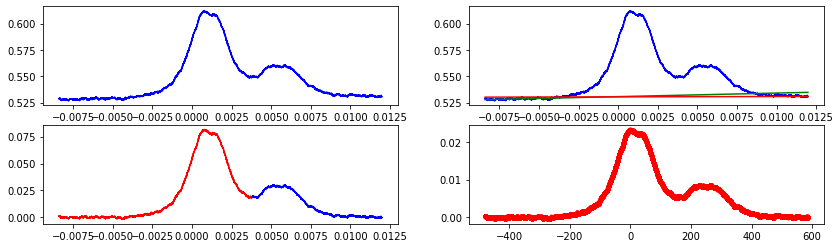

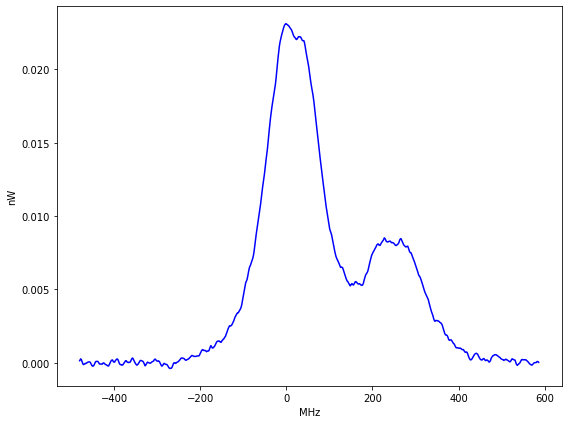

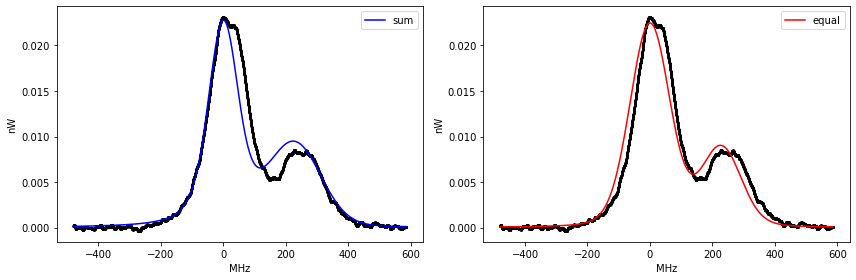

In [84]:
data = pd.read_csv("data/newnew_data/{}.CSV".format(414))

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])
x, y = preprocess(x, y, 0.15, 0.001)

x, y, idx1, idx2 = process(x, y, 0.1, 0.027, 0.6)

params414_1, params414_2 = fit(x, y, idx1, idx2)

print(params414_1, params414_2)

[1.80776383e-02 7.25250093e-03 5.63179165e+01] [2.655509144218424, 1.3340901936326728, 34.3751140303946, 68.37966665917742, 26.792107928243656, 4.712297568074645]


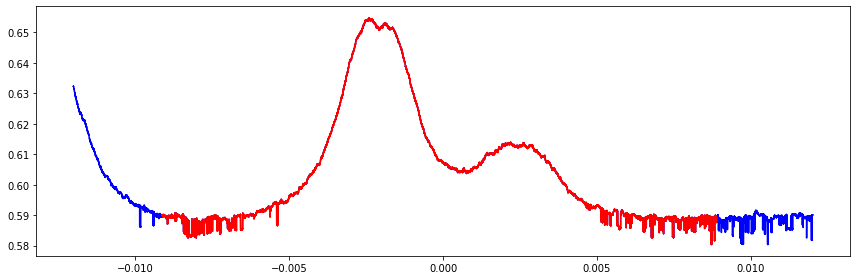

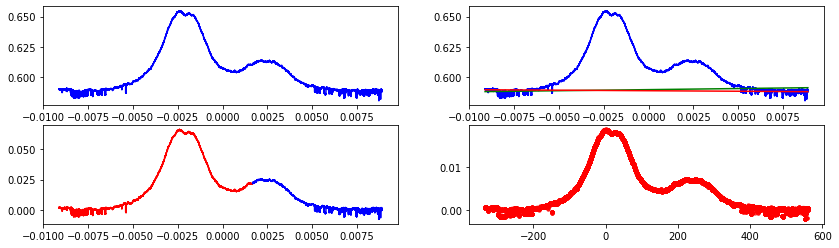

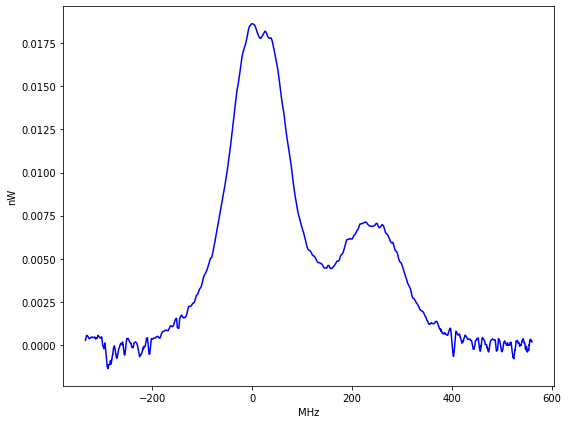

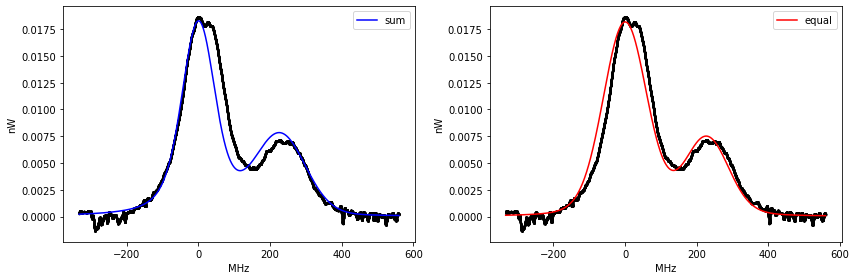

In [75]:
data = pd.read_csv("data/newnew_data/{}.CSV".format(426))

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])
x, y = preprocess(x, y, 0.12, 0.13)

x, y, idx1, idx2 = process(x, y, 0.17, 0.1, 0.6)

params426_1, params426_2 = fit(x, y, idx1, idx2)

print(params426_1, params426_2)

[2.05114270e-02 8.46025475e-03 5.75036512e+01] [3.2479564460242196, 1.7741558000363096, 28.16233614321101, 70.1286253025587, 35.84961836390219, 18.462789931628816]


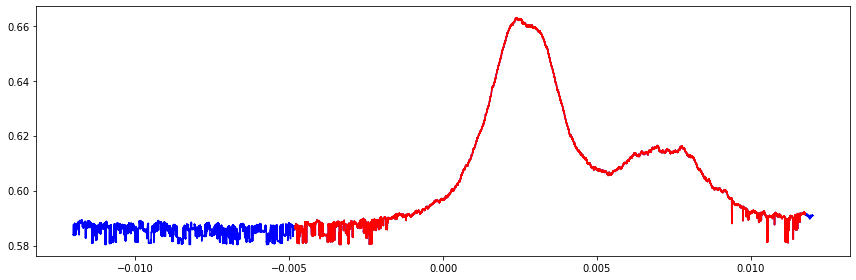

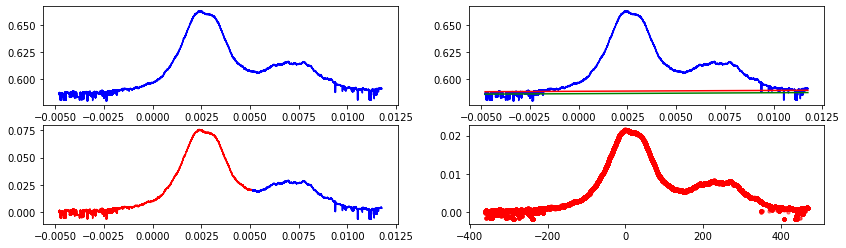

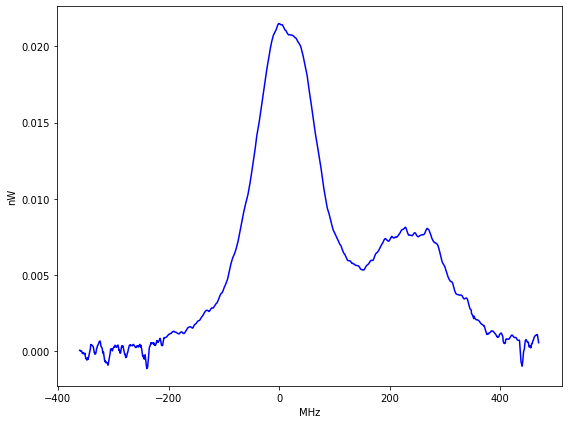

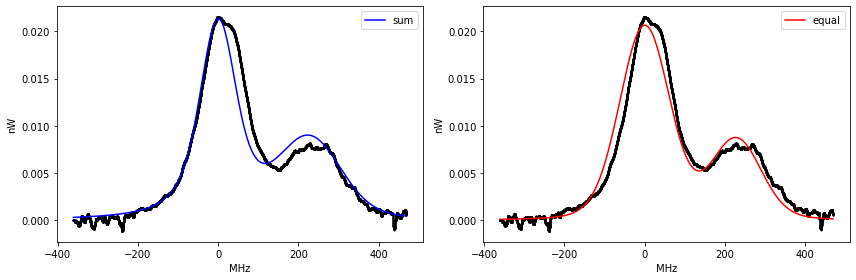

In [22]:
data = pd.read_csv("data/newnew_data/{}.CSV".format(432))

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])
x, y = preprocess(x, y, 0.3, 0.01)

x, y, idx1, idx2 = process(x, y, 0.15, 0.065, 0.6)

params432_1, params432_2 = fit(x, y, idx1, idx2)

print(params432_1, params432_2)

[2.09640926e-02 7.51489947e-03 4.93041741e+01] [2.9211978903950313, 0.9978519543805702, 44.42658401954268, 25.195735521128224, 12.31242208394449, 29.674210957553502]


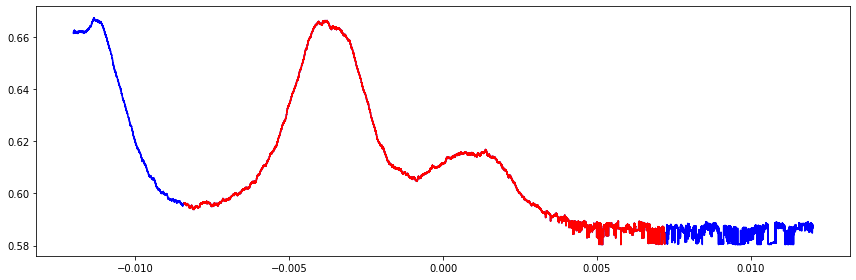

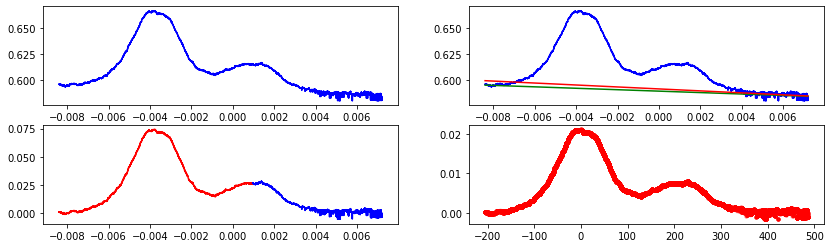

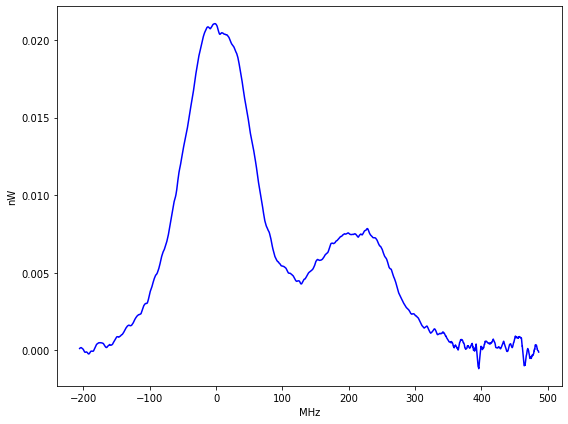

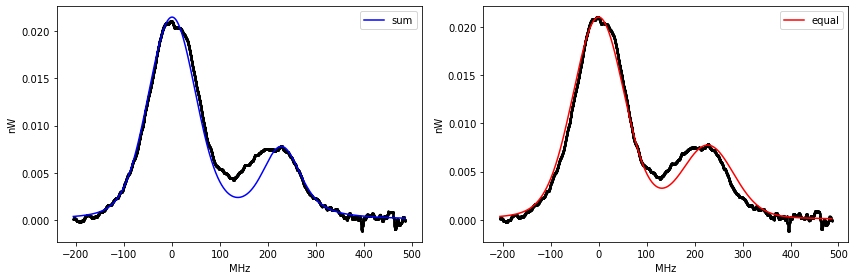

In [71]:
data = pd.read_csv("data/newnew_data/{}.CSV".format(440))

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])
x, y = preprocess(x, y, 0.15, 0.2)

x, y, idx1, idx2 = process(x, y, 0.037, 0.15, 0.6)

params440_1, params440_2 = fit(x, y, idx1, idx2)

print(params440_1, params440_2)

[2.68882426e-02 1.13524127e-02 5.72093755e+01] [4.126306467754323, 2.8175726772066763, 34.96090544924747, 31.318771287022983, 28.459008423049703, 67.27102344938581]


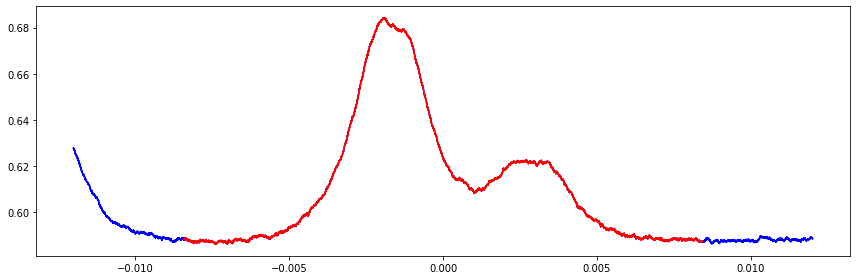

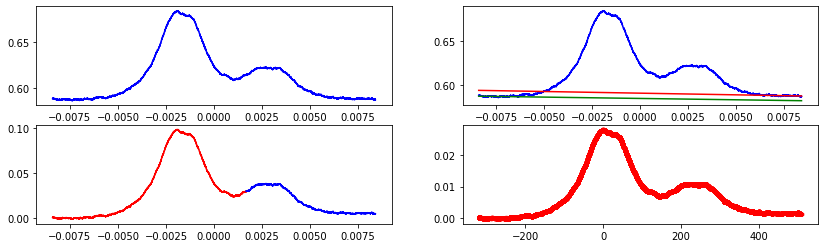

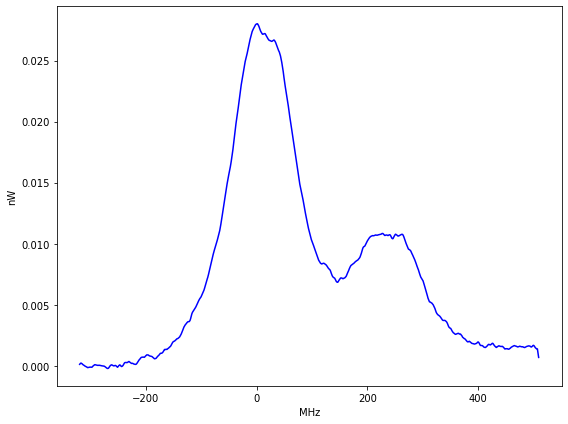

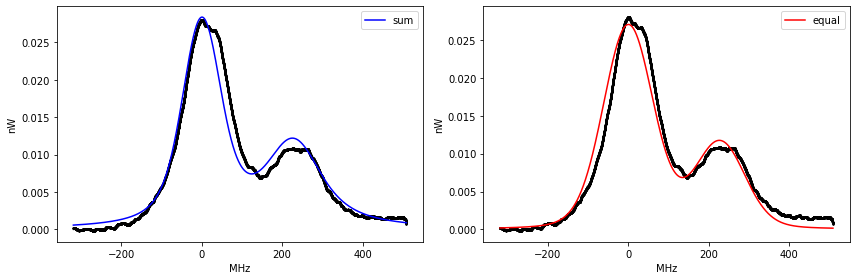

In [70]:
data = pd.read_csv("data/newnew_data/{}.CSV".format(458))

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])
x, y = preprocess(x, y, 0.15, 0.15)

x, y, idx1, idx2 = process(x, y, 0.1, 0.1, 0.6)

params458_1, params458_2 = fit(x, y, idx1, idx2)

print(params458_1, params458_2)

In [103]:
params = [params362_1, 
          params371_1, 
          params390_1,
          params400_1, 
          params408_1,
          params414_1,
          params440_1,
          params458_1]


a1, a2, s, g = [], [], [], []

for p in params:
    a1.append(p[0])
    a2.append(p[1])
    s.append(p[2])
#     g.append(p[3])
    
# , "G, MHz" : g
res = pd.DataFrame({"A1, nW" : a1, "A2, nW" : a2, "S, MHz" : s})
display(res)

,"A1, nW","A2, nW","S, MHz"
0,0.014708,0.005252,58.918339
1,0.015866,0.005880,60.402666
2,0.020065,0.007024,61.969670
3,0.021007,0.007183,51.204132
4,0.022273,0.008240,56.177199
5,0.022334,0.008676,59.070538
6,0.020964,0.007515,49.304174
7,0.026888,0.011352,57.209376


0.0001256384858735576 6.283790254372782e-05
-0.06421222917636368 -0.03467669575041893
0.5001485182412003


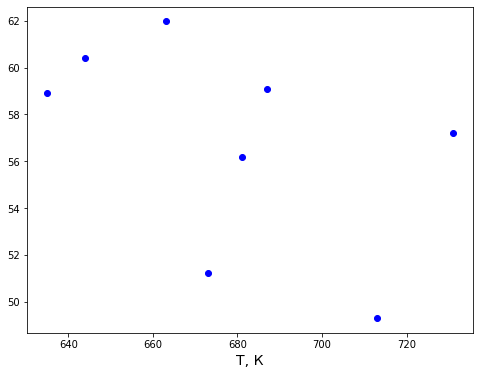

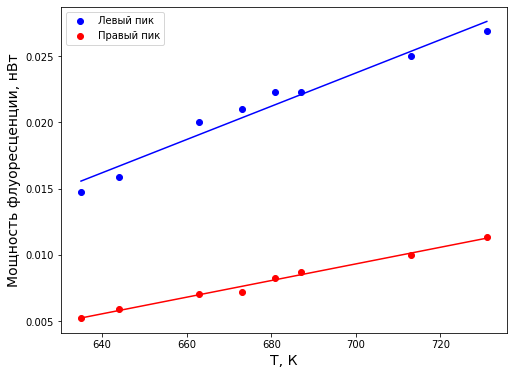

In [134]:
T = np.array([362, 371, 390, 400, 408, 414, 440, 458]) + 273


a1[-2] = 0.025
a2[-2] = 0.01

# plt.figure(figsize=(10, 10))
# plt.subplot(221)
# plt.scatter(T, s)

# plt.subplot(222)
# plt.plot(T, np.absolute(g))


# plt.subplot(222)
# plt.plot(T, (np.array(a1) + np.array(a2)) / 2)
plt.figure(figsize=(8, 6))
plt.scatter(T, s, color="blue")
plt.xlabel("T, К",fontsize=14)


# plt.figure(figsize=(8, 6))

# plt.title("Амплитуда левого пика")
# plt.xlabel("T, К",fontsize=14)
# plt.ylabel("Мощность флуоресценции, нВт")

plt.figure(figsize=(8, 6))
plt.scatter(T, a1, color="blue", label="Левый пик")
plt.scatter(T, a2, color="red", label="Правый пик")
# plt.title("Амплитуда пиков")
plt.xlabel("T, К",fontsize=14)
plt.ylabel("Мощность флуоресценции, нВт", fontsize=14)
# plt.tight_layout()
plt.scatter([0], [0], color="black")

plt.legend()
k1, b1 = np.polyfit(T, a1, deg=1)
k2, b2 = np.polyfit(T, a2, deg=1)

plt.plot(T, k1 * T + b1, color="blue")
plt.plot(T, k2 * T + b2, color="red")



print(k1, k2)
print(b1, b2)
print(k2/k1)

In [ ]:
v = np.linspace(-200, 400, 200)


for p, i in zip(params, range(len(params))):
    plt.plot(v, bivoigt_equal(v, *p), color=(0,i*0.06,0))
    
    
print(np.mean(g))

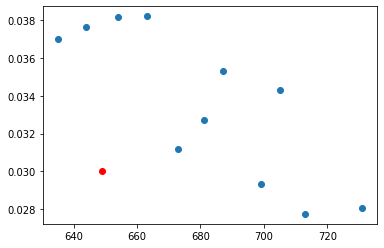

In [94]:
df_res = pd.DataFrame({"T, K" : T, "sigma, MHz" : s,
                       "v_perp, m/s" : np.zeros(len(T)),
                       "v_z(theor), m/s" : np.zeros(len(T))})


# df_res["lifetime, ns"] = round(1 / (2 * np.pi * df_res["gamma, MHz"]) * 1000, 1)

df_res["v_perp, m/s"] = round(671 * 2 ** 0.5 * df_res["sigma, MHz"] * 0.001, 1)

df_res["v_z(theor), m/s"] = round(100 * ((3 * 1.38) / (6.94 * 1.66) * df_res["T, K"]) ** 0.5, 1)

# df_res["2tau, mrad"] = round(2000 * df_res["v_perp, m/s"] / df_res["v_z(theor), m/s"])


df_res

vz = np.array(df_res["v_z(theor), m/s"])
vp = np.array(df_res["v_perp, m/s"])

plt.scatter(T, vp/vz)
plt.scatter([376 + 273], [0.03], color="red")

In [44]:
def transform(dv):
    return np.round(dv * 670.9 * 10**(3))

def ttov(t):
    return np.round(np.sqrt(2 * t * 1.38 * 10**4 / (6.941 * 1.66)))

In [45]:
T = np.array([426, 400, 381]) + 273
dv = - np.array([446.79752, 446.79757,  446.79759]) + 446.7998

vz_theor = ttov(T)

vz_real = transform(dv)

vel = pd.DataFrame({"T" : T, "v_z_theor, м/с" : vz_theor, "v_z_real, м/с" : vz_real})
display(vel)


print(vel.to_latex())

,T,"v_z_theor, м/с","v_z_real, м/с"
0,699,1294.0,1530.0
1,673,1270.0,1496.0
2,654,1252.0,1483.0


\begin{tabular}{lrrr}
\toprule
{} &    T &  v\_z\_theor, м/с &  v\_z\_real, м/с \\
\midrule
0 &  699 &          1294.0 &         1530.0 \\
1 &  673 &          1270.0 &         1496.0 \\
2 &  654 &          1252.0 &         1483.0 \\
\bottomrule
\end{tabular}



/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_1000/2280665485.py:12: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(vel.to_latex())


In [22]:
def fit2(x, y, idx1, idx2):
    p1, p2 = curve_fit(voigt, x[:idx1], y[:idx1])[0], curve_fit(voigt, x[idx2:] - 228.2, y[idx2:])[0]
    a1, s1, g1, a2, s2, g2 = *p1, *p2
    s = (s1 + s2) / 2
    g = (g1 + g2) / 2

    params = curve_fit(bivoigt_equal, x, y, [a1, a2, s])[0]

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.scatter(x, y, alpha=0.1, s=1, color="black")
    plt.plot(x, voigt(x, *p1) + voigt(x - 228.2, *p2), color="blue", label="sum")
    plt.xlabel("MHz")
    plt.ylabel("nW")
    plt.legend()

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.1, s=1, color="black")
    plt.plot(x, bivoigt_equal(x, *params), color="red")
    plt.legend()
    plt.xlabel("МГц", fontsize=14)
    plt.ylabel("нВт", fontsize=14)
    plt.title("Сумма профилей Фойгта после обработки", fontsize=14)

    plt.tight_layout()

    return params, [a1, a2, s1, s2, g1, g2]


Text(0.5, 15.0, 'МГц')

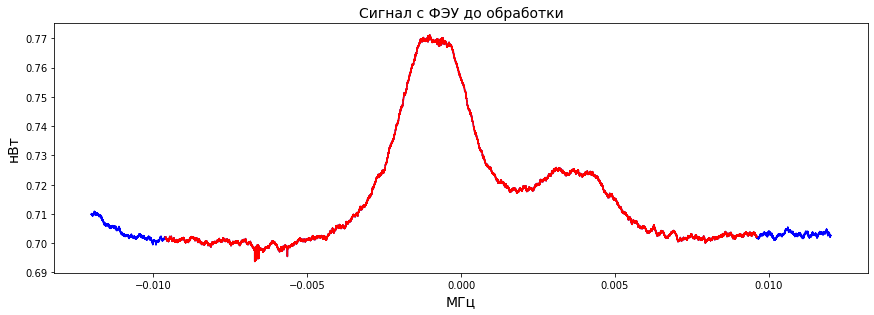

In [27]:
data = pd.read_csv("data/newnew_data/{}.CSV".format(390))

x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])
x, y = preprocess(x, y, 0.1, 0.1)


# x, y, idx1, idx2 = process(x, y, 0.15, 0.15, 0.6)

plt.title("Сигнал с ФЭУ до обработки",  fontsize=14)
plt.ylabel("нВт", fontsize=14)
plt.xlabel("МГц", fontsize=14)

# param = fit2(x, y, idx1, idx2)[0]

# print(params390_1, params390_2)